# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv('1.4 business_type.csv', sep=',', encoding='UTF-8')

In [2]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.describe()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,...,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,...,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,...,18,8,82,82,14,10,15,10,16,9


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [15]:
seoul_business.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [23]:
seoul_business.loc[2]

자치구                  합계
동                    합계
다수업종 상위10        47,176
다수업종 상위10.1      76,701
다수업종 상위10.2      29,225
다수업종 상위10.3     100,183
다수업종 상위10.4      28,494
다수업종 상위10.5      29,356
다수업종 상위10.6      24,013
다수업종 상위10.7      42,636
다수업종 상위10.8      18,080
다수업종 상위10.9      36,214
다수업종 상위10.10     16,255
다수업종 상위10.11     57,322
다수업종 상위10.12     13,388
다수업종 상위10.13     51,116
다수업종 상위10.14     13,339
다수업종 상위10.15     31,371
다수업종 상위10.16     11,911
다수업종 상위10.17     50,773
다수업종 상위10.18     11,109
다수업종 상위10.19     44,653
Name: 2, dtype: object

#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.loc[seoul_business['동']=='소계']

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
21,중구,소계,230,235,"1,588","6,414",300,333,576,"1,152",...,869,"3,542","10,810","24,248",381,982,57,175,443,"2,121"
37,용산구,소계,416,523,857,"2,987",455,466,791,"1,214",...,634,"2,076",54,317,487,"1,332",104,573,300,"1,184"
54,성동구,소계,"1,200","2,527",956,"2,785","1,072","1,161",801,"1,453",...,547,"1,859",149,"1,572",285,621,258,"1,494",400,"1,545"
72,광진구,소계,"1,119","1,744",963,"2,861",968,985,871,"1,313",...,590,"1,887",89,687,633,"1,577",413,"1,646",467,"1,678"
88,동대문구,소계,"1,546","2,093","1,236","3,566","1,431","1,456",842,"1,208",...,494,"1,472",211,976,499,"1,082",302,984,442,"1,509"
103,중랑구,소계,"3,634","6,262",991,"2,479","1,804","1,877",738,"1,104",...,381,"1,037",63,284,535,"1,000",288,"1,045",499,"1,504"
120,성북구,소계,"1,835","2,643",973,"2,822","1,312","1,335",846,"1,175",...,457,"1,384",85,454,512,"1,030",464,"1,755",365,"1,334"
141,강북구,소계,"1,713","2,589",965,"2,663","1,024","1,030",589,867,...,358,"1,095",40,94,580,"1,275",220,740,362,"1,176"
155,도봉구,소계,"2,993","5,783",672,"2,009","1,571","1,574",515,794,...,288,837,22,43,258,477,351,"1,162",302,943


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business = seoul_business.loc[seoul_business['동']=='소계'].reset_index(drop=True)

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
1,중구,소계,230,235,"1,588","6,414",300,333,576,"1,152",...,869,"3,542","10,810","24,248",381,982,57,175,443,"2,121"
2,용산구,소계,416,523,857,"2,987",455,466,791,"1,214",...,634,"2,076",54,317,487,"1,332",104,573,300,"1,184"
3,성동구,소계,"1,200","2,527",956,"2,785","1,072","1,161",801,"1,453",...,547,"1,859",149,"1,572",285,621,258,"1,494",400,"1,545"
4,광진구,소계,"1,119","1,744",963,"2,861",968,985,871,"1,313",...,590,"1,887",89,687,633,"1,577",413,"1,646",467,"1,678"
5,동대문구,소계,"1,546","2,093","1,236","3,566","1,431","1,456",842,"1,208",...,494,"1,472",211,976,499,"1,082",302,984,442,"1,509"
6,중랑구,소계,"3,634","6,262",991,"2,479","1,804","1,877",738,"1,104",...,381,"1,037",63,284,535,"1,000",288,"1,045",499,"1,504"
7,성북구,소계,"1,835","2,643",973,"2,822","1,312","1,335",846,"1,175",...,457,"1,384",85,454,512,"1,030",464,"1,755",365,"1,334"
8,강북구,소계,"1,713","2,589",965,"2,663","1,024","1,030",589,867,...,358,"1,095",40,94,580,"1,275",220,740,362,"1,176"
9,도봉구,소계,"2,993","5,783",672,"2,009","1,571","1,574",515,794,...,288,837,22,43,258,477,351,"1,162",302,943


In [13]:
seoul_coffee = df_seoul_business.loc[:,['자치구','다수업종 상위10.10','다수업종 상위10.11']]

In [14]:
seoul_coffee

,자치구,다수업종 상위10.10,다수업종 상위10.11
0,종로구,948,"3,613"
1,중구,869,"3,542"
2,용산구,634,"2,076"
3,성동구,547,"1,859"
4,광진구,590,"1,887"
5,동대문구,494,"1,472"
6,중랑구,381,"1,037"
7,성북구,457,"1,384"
8,강북구,358,"1,095"
9,도봉구,288,837


In [15]:
seoul_coffee.columns = ['자치구', '커피전문점 사업체수', '커피전문점 종사자수']

In [18]:
seoul_coffee

,자치구,커피전문점 사업체수,커피전문점 종사자수
0,종로구,948,3613
1,중구,869,3542
2,용산구,634,2076
3,성동구,547,1859
4,광진구,590,1887
5,동대문구,494,1472
6,중랑구,381,1037
7,성북구,457,1384
8,강북구,358,1095
9,도봉구,288,837


In [17]:
seoul_coffee["커피전문점 사업체수"] = seoul_coffee["커피전문점 사업체수"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
seoul_coffee = seoul_coffee.astype({'커피전문점 사업체수' : 'int'})

seoul_coffee["커피전문점 종사자수"] = seoul_coffee["커피전문점 종사자수"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
seoul_coffee = seoul_coffee.astype({'커피전문점 종사자수' : 'int'})

In [19]:
seoul_coffee.to_csv("4_seoul_coffee.csv", index = False)

In [19]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.

df_seoul_business.to_csv("df_seoul_business.csv", index = False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [31]:
# 택시
df_seoul_business["다수업종 상위10.1"] = df_seoul_business["다수업종 상위10.1"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_seoul_business = df_seoul_business.astype({'다수업종 상위10.1' : 'int'})
# 식당
df_seoul_business["다수업종 상위10.3"] = df_seoul_business["다수업종 상위10.3"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_seoul_business = df_seoul_business.astype({'다수업종 상위10.3' : 'int'})
# 카페
df_seoul_business["다수업종 상위10.11"] = df_seoul_business["다수업종 상위10.11"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df_seoul_business = df_seoul_business.astype({'다수업종 상위10.11' : 'int'})

AttributeError: Can only use .str accessor with string values!

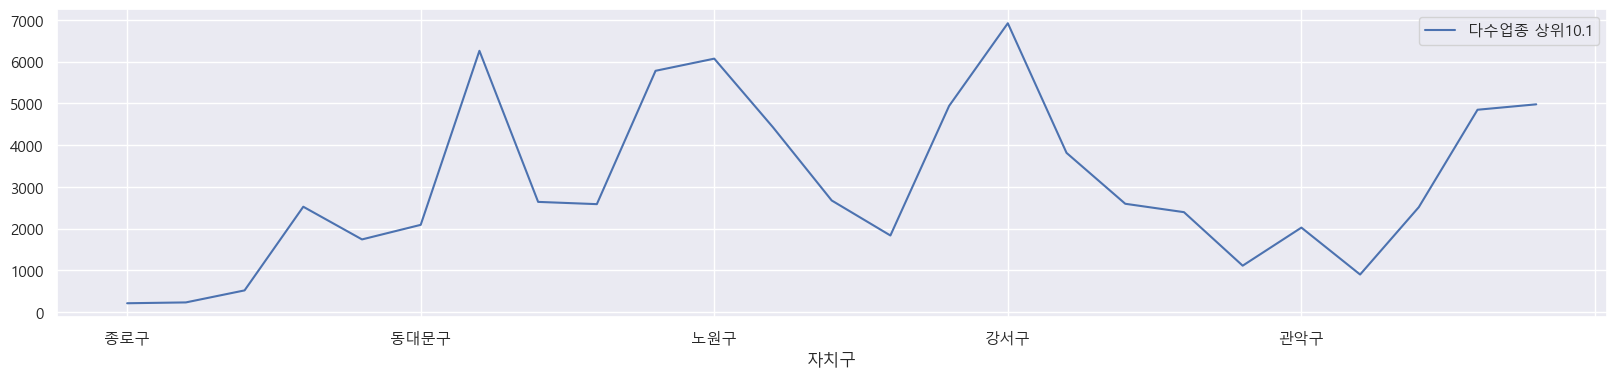

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business.plot(x='자치구', y = '다수업종 상위10.1',figsize=(20,4))
plt.show()

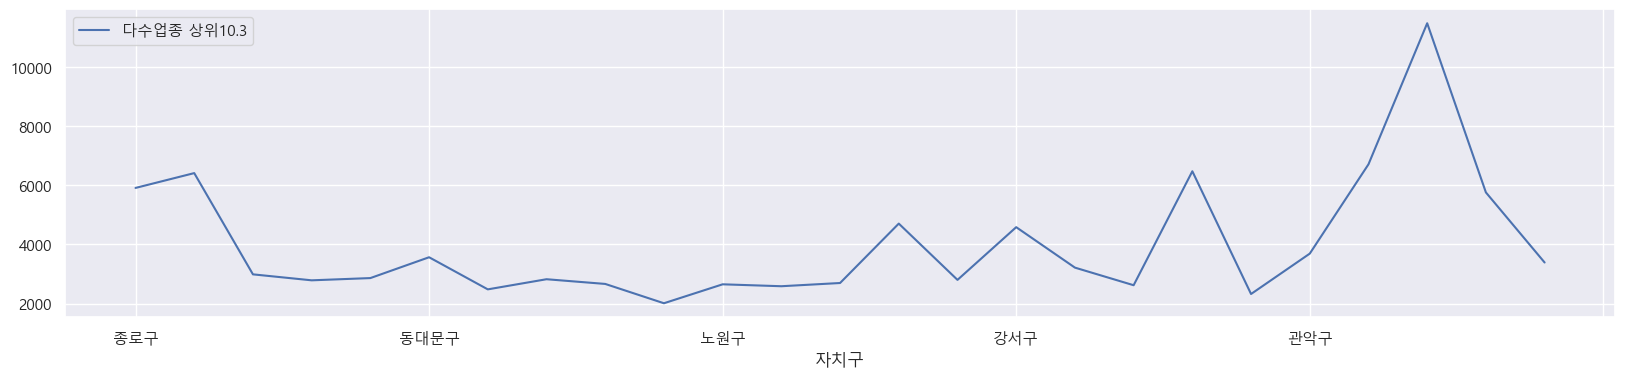

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business.plot(x='자치구', y = '다수업종 상위10.3',figsize=(20,4))
plt.show()

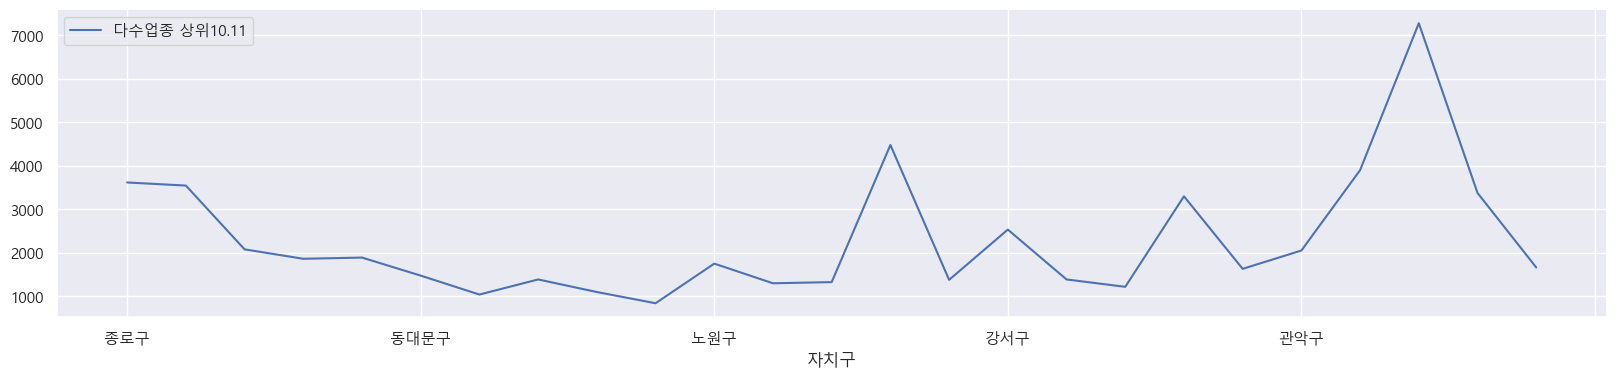

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business.plot(x='자치구', y = '다수업종 상위10.11',figsize=(20,4))
plt.show()

In [35]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 서울시 가장 규모 큰 사업체 : 음식점, 택시, 카페
# 1. 음식점 직원수가 가장 많은 지역은 강서구
# 2. 택시 직원수가 가장 많은 지역은 강남구
# 3. 카페 직원수가 가장 많은 지역은 강남구

---